In [53]:
import random
import math
import matplotlib.pyplot as plt

# Coordenadas de las ciudades (ejemplo con 5 ciudades)
ciudades = {
    'Peru': (5, 25),
    'Chile': (10, 5),
    'Colombia': (15, 35),
    'Bolivia': (20, 20),
    'Argentina': (35, 10),
    'Venezuela': (35, 40),
    'Brazil': (40, 25),
}

num_ciudades = len(ciudades)
nombres_ciudades = list(ciudades.keys())

def distancia(ciudad1, ciudad2):
  x1, y1 = ciudades[ciudad1]
  x2, y2 = ciudades[ciudad2]
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calcular_longitud_ruta(ruta):
  longitud = 0
  for i in range(num_ciudades):
    ciudad_actual = ruta[i]
    ciudad_siguiente = ruta[(i + 1) % num_ciudades] # Vuelve a la primera ciudad al final
    longitud += distancia(ciudad_actual, ciudad_siguiente)
  return longitud

ruta_inicial = random.sample(nombres_ciudades, num_ciudades)
print(f"Ruta inicial: {ruta_inicial}")
print(f"Longitud de la ruta inicial: {calcular_longitud_ruta(ruta_inicial):.2f}")

Ruta inicial: ['Venezuela', 'Argentina', 'Colombia', 'Chile', 'Bolivia', 'Peru', 'Brazil']
Longitud de la ruta inicial: 177.08


In [54]:
def generar_vecino_tsp(ruta_actual):
  vecino = ruta_actual[:] # Crear una copia de la ruta actual
  i, j = random.sample(range(num_ciudades), 2)
  vecino[i], vecino[j] = vecino[j], vecino[i]
  return vecino

In [55]:
def simulated_annealing_tsp(ruta_inicial, temp_inicial, temp_final, factor_enfriamiento, iteraciones_por_temp):
  ruta_actual = ruta_inicial
  mejor_ruta = ruta_inicial[:]
  longitud_actual = calcular_longitud_ruta(ruta_actual)
  mejor_longitud = longitud_actual
  temperatura = temp_inicial

  historial_longitudes = [longitud_actual]

  while temperatura > temp_final:
    for _ in range(iteraciones_por_temp):
      # Generar un vecino (intercambiar dos ciudades)
      ruta_nueva = generar_vecino_tsp(ruta_actual)
      longitud_nueva = calcular_longitud_ruta(ruta_nueva)
      delta_longitud = longitud_nueva - longitud_actual

      # Criterio de aceptación de Metropolis (minimización de la longitud)
      if delta_longitud < 0 or random.random() < math.exp(-delta_longitud / temperatura):
        ruta_actual = ruta_nueva
        longitud_actual = longitud_nueva

        if longitud_actual < mejor_longitud:
          mejor_ruta = ruta_actual[:]
          mejor_longitud = longitud_actual
          print(f"Mejor ruta encontrada: {mejor_ruta} con longitud: {mejor_longitud:.2f} a temperatura: {temperatura:.2f}")

      historial_longitudes.append(longitud_actual)

    # Enfriar la temperatura
    temperatura *= factor_enfriamiento

  print(f"\nSolución final encontrada: {mejor_ruta} con longitud: {mejor_longitud:.2f}")
  return mejor_ruta, historial_longitudes

Mejor ruta encontrada: ['Bolivia', 'Chile', 'Peru', 'Argentina', 'Venezuela', 'Colombia', 'Brazil'] con longitud: 170.34 a temperatura: 1000.00
Mejor ruta encontrada: ['Peru', 'Chile', 'Bolivia', 'Argentina', 'Venezuela', 'Colombia', 'Brazil'] con longitud: 169.21 a temperatura: 1000.00
Mejor ruta encontrada: ['Peru', 'Chile', 'Brazil', 'Argentina', 'Venezuela', 'Colombia', 'Bolivia'] con longitud: 154.72 a temperatura: 1000.00
Mejor ruta encontrada: ['Peru', 'Venezuela', 'Brazil', 'Argentina', 'Bolivia', 'Chile', 'Colombia'] con longitud: 145.78 a temperatura: 1000.00
Mejor ruta encontrada: ['Argentina', 'Brazil', 'Bolivia', 'Chile', 'Peru', 'Colombia', 'Venezuela'] con longitud: 139.83 a temperatura: 1000.00
Mejor ruta encontrada: ['Brazil', 'Venezuela', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Bolivia'] con longitud: 135.32 a temperatura: 1000.00
Mejor ruta encontrada: ['Argentina', 'Chile', 'Peru', 'Bolivia', 'Colombia', 'Venezuela', 'Brazil'] con longitud: 129.97 a temperatura: 

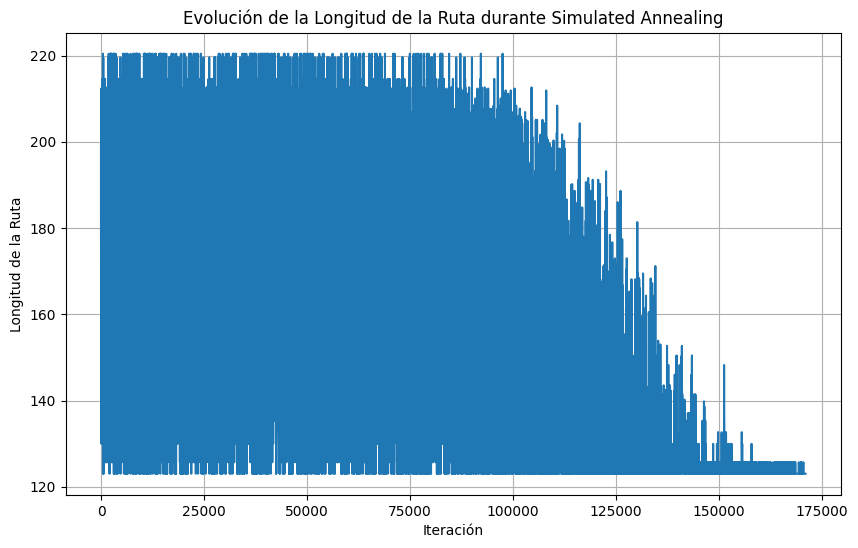

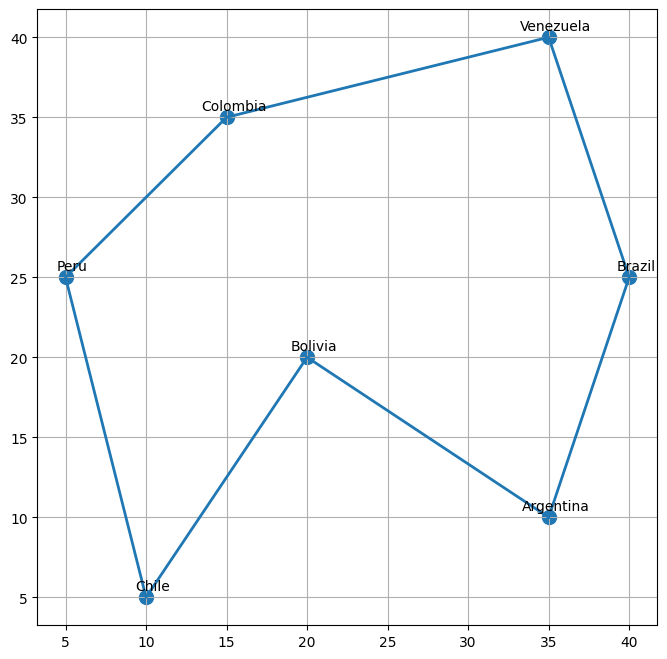

In [56]:
# Definir los parámetros del Simulated Annealing para el TSP
temp_inicial_tsp = 1000.0
temp_final_tsp = 1.0
factor_enfriamiento_tsp = 0.98
iteraciones_por_temp_tsp = 500

# Ejecutar el algoritmo
mejor_ruta_tsp, historial_longitudes_tsp = simulated_annealing_tsp(
    ruta_inicial,
    temp_inicial_tsp,
    temp_final_tsp,
    factor_enfriamiento_tsp,
    iteraciones_por_temp_tsp
)

# Visualizar la mejor ruta
def visualizar_ruta(ruta, ciudades):
  """Visualiza la ruta en un gráfico."""
  x = [ciudades[ciudad][0] for ciudad in ruta] + [ciudades[ruta[0]][0]]
  y = [ciudades[ciudad][1] for ciudad in ruta] + [ciudades[ruta[0]][1]]
  nombres = list(ruta) + [ruta[0]]

  plt.figure(figsize=(8, 8))
  plt.scatter([ciudades[c][0] for c in ciudades], [ciudades[c][1] for c in ciudades], s=100)
  for nombre, coords in ciudades.items():
    plt.annotate(nombre, coords, textcoords="offset points", xytext=(5,5), ha='center')
  plt.plot(x, y, linestyle='-', linewidth=2)
  plt.grid(True)
  plt.show()

# Visualizar la evolución de la longitud de la ruta
plt.figure(figsize=(10, 6))
plt.plot(historial_longitudes_tsp)
plt.xlabel("Iteración")
plt.ylabel("Longitud de la Ruta")
plt.title("Evolución de la Longitud de la Ruta durante Simulated Annealing")
plt.grid(True)
plt.show()

visualizar_ruta(mejor_ruta_tsp, ciudades)